# Lab 1

In [2]:
import numpy as np
import pandas as pd
import scipy

import ugradio
import ugradio.pico as pico
import ugradio.dft as dft

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

## 5.1: Sample signal
parameters:
    - Voltage Range: 1V
    - N = 1
    - Dual = True
    - Nblocks = 3

In [3]:
imported_data = np.load("data.npz")

In [4]:
sig_a_data = imported_data["arr_0"][0,0, :200]
sig_a_data[:10]

array([ -9216,  11008, -12544,  14080, -15104,  16128, -16640,  17152,
       -17152,  17152], dtype=int16)

In [5]:
sig_b_data = imported_data["arr_0"][1,0,:200]
sig_b_data[:10]

array([ 16640,   3584, -10496, -19200, -19200, -10240,   4096,  16896,
        21248,  14848], dtype=int16)

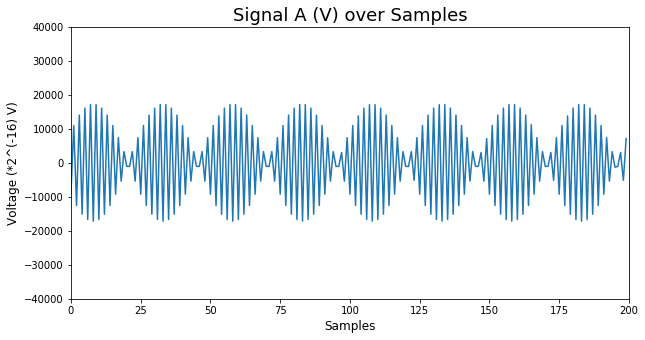

In [6]:
# signal A over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Voltage (*2^(-16) V)", fontsize=12)
plt.title("Signal A (V) over Samples", fontsize=18)
plt.plot(sig_a_data, linewidth=1.5)

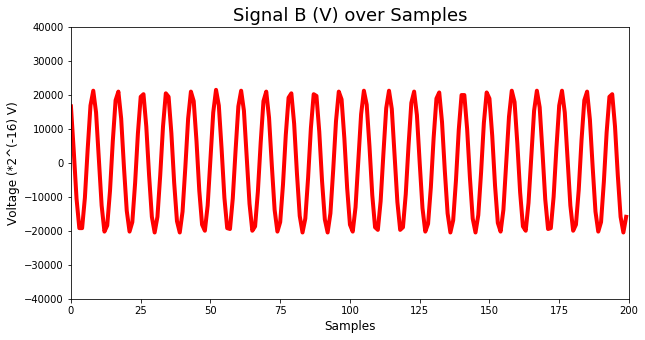

In [7]:
# signal B over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Voltage (*2^(-16) V)", fontsize=12)
plt.title("Signal B (V) over Samples", fontsize=18)
plt.plot(sig_b_data,  'r', linewidth=4)

# 5.2 : Put x-axis in time units

In [8]:
data_length = len(sig_a_data)
N = 1
sampling_frequency_Hz = 62.5e6/N #cool 
delta_t = 1/sampling_frequency_Hz
total_time = delta_t * data_length  

In [9]:
times = np.arange(0, total_time, delta_t)
times[:10]

array([0.00e+00, 1.60e-08, 3.20e-08, 4.80e-08, 6.40e-08, 8.00e-08,
       9.60e-08, 1.12e-07, 1.28e-07, 1.44e-07])

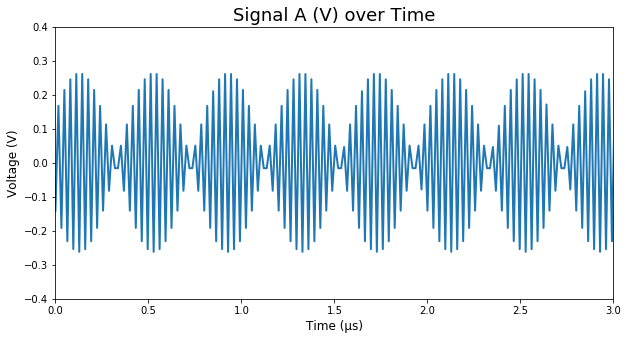

In [10]:
# signal A over time
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-.4,.4)
plt.xlabel("Time (μs)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Signal A (V) over Time", fontsize=18)
plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=2)

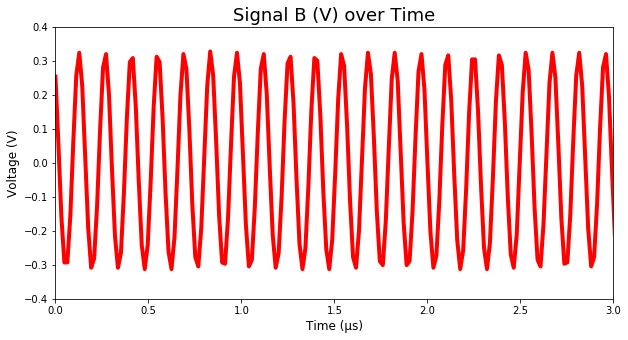

In [11]:
# signal B over time
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-.4,.4)
plt.xlabel("Time (μs)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Signal B (V) over Time", fontsize=18)
plt.plot(times*(10**6), sig_b_data/(2**16),  'r', linewidth=4)

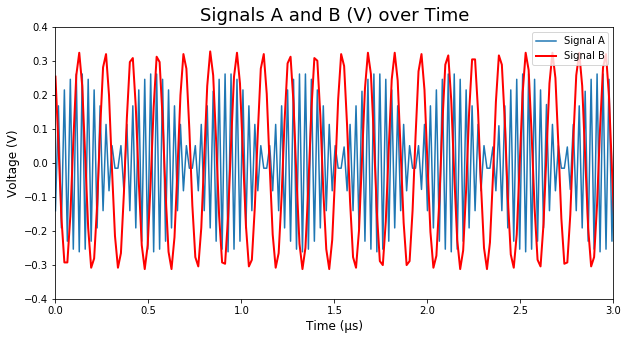

In [12]:
plt.figure(figsize=(10,5))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-0.4,0.4)
plt.xlabel("Time (μs)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.title("Signals A and B (V) over Time", fontsize=18)

plt.plot(times*(10**6), sig_a_data/(2**16), label='Signal A', linewidth=1.5)
plt.plot(times*(10**6), sig_b_data/(2**16), 'r', label='Signal B', linewidth=2)
plt.legend(loc='upper right')

# 5.2: Derive and plot fourier power spectrum

In [13]:
# dft.dft
dft_sig_a = dft.dft(sig_a_data, vsamp=62500000)[1]
dft_sig_b = dft.dft(sig_b_data, vsamp=62500000)[1]

ft_time = dft.dft(sig_a_data, vsamp=62500000)[0]
ft_time1= ft_time/10**6 #unit conversion to MHz

# numpy.fft.fft
fft_sig_a = np.fft.fft(sig_a_data)
fft_sig_a = np.fft.fftshift(fft_sig_a)

fft_sig_b = np.fft.fft(sig_b_data)
fft_sig_b = np.fft.fftshift(fft_sig_b)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Signal A Discrete and Fast Fourier Transforms')

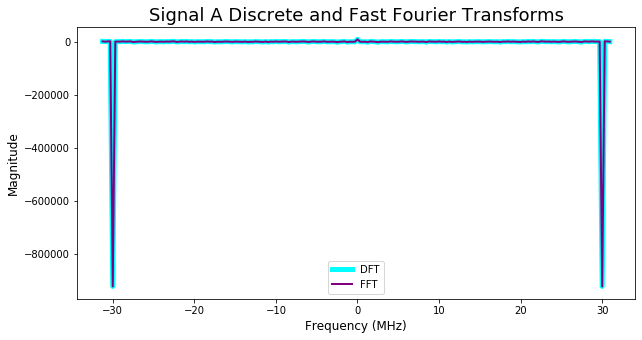

In [14]:
# dft and fft plots for Signal A
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_a, 'cyan', linewidth=5.0)
plt.plot(ft_time1, fft_sig_a, 'purple', linewidth=2)
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.legend(["DFT", "FFT"])
plt.title("Signal A Discrete and Fast Fourier Transforms", fontsize=18)

Text(0.5, 1.0, 'Signal B Discrete and Fast Fourier Transforms')

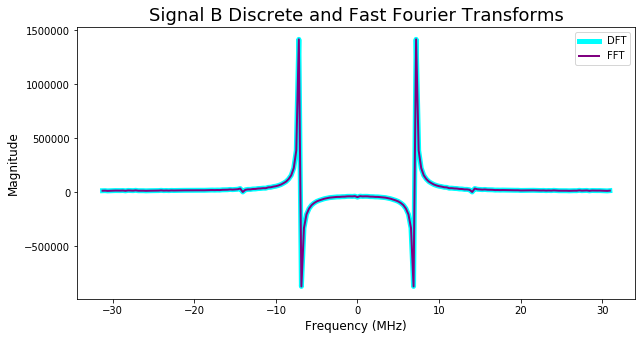

In [15]:
# dft and fft plots for Signal B
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_b, 'cyan', linewidth=5.0)
plt.plot(ft_time1, fft_sig_b, 'purple', linewidth=2)
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.legend(["DFT", "FFT"])
plt.title("Signal B Discrete and Fast Fourier Transforms", fontsize=18)

In [16]:
power_ft_sig_a = [abs(s)**2 for s in fft_sig_a]
power_ft_sig_b = [abs(s)**2 for s in fft_sig_b]

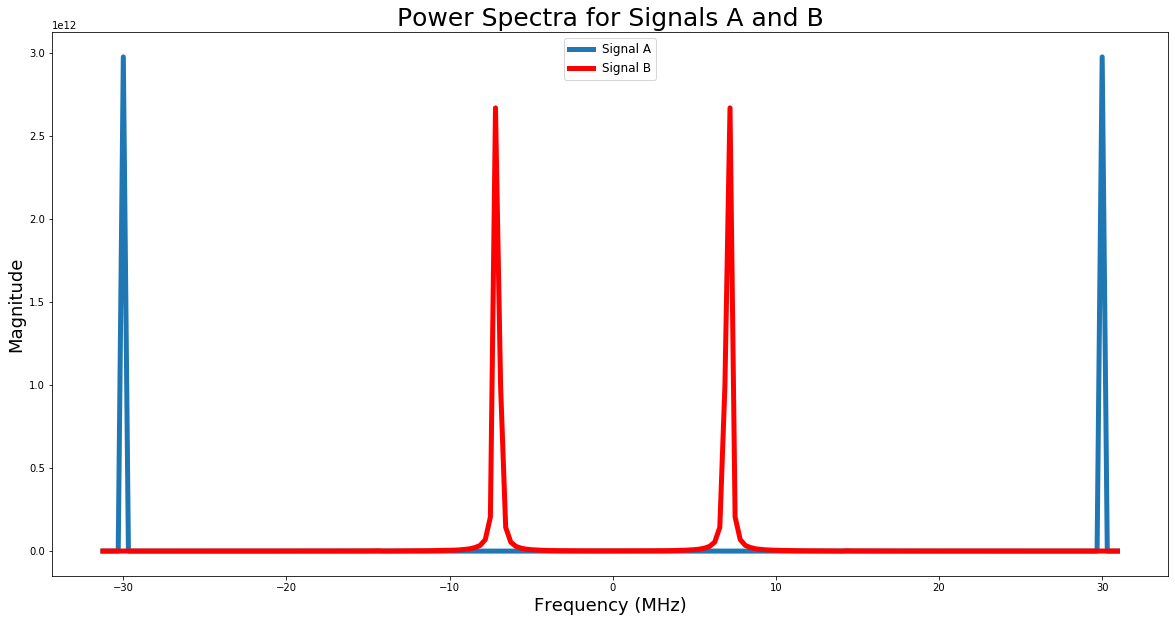

In [17]:
# fft power spectra comparison for signals a and b
plt.figure(figsize=(20,10))
plt.plot(ft_time1, power_ft_sig_a, linewidth=5)
plt.plot(ft_time1, power_ft_sig_b, 'r', linewidth=5)
plt.xlabel("Frequency (MHz)", fontsize=18)
plt.ylabel("Magnitude", fontsize=18)
plt.title("Power Spectra for Signals A and B", fontsize=25)
plt.legend(["Signal A", "Signal B"], fontsize=12)
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

## Find Signal A Frequency

In [18]:
i = power_ft_sig_a.index(max(power_ft_sig_a))
sig_a_dft_frequency = abs(ft_time1[i])
print("Signal A frequency: " + str(sig_a_dft_frequency) + " MHz")

Signal A frequency: 30.0 MHz


In [19]:
N = 1
f_s = sampling_frequency_Hz/(N*(10**6))
f_max = sig_a_dft_frequency
alias_difference_a = 2*abs(f_s/2-f_max)
print("Satisfied Nyquist Criterion: " + str(f_s) + str(' > ') + str(2*f_max) + " " + str(f_s>2*f_max))
print("alias range: " + str(alias_difference_a))
print("Minimum Sampling Frequency (assuming no alias): " + str(f_max*2))
print("Other Possible Frequencies : " ) #62.5/2-f_max*N until < 0 and 62.5/2+f_max*N until > 2*f_S and 

Satisfied Nyquist Criterion: 62.5 > 60.0 True
alias range: 2.5
Minimum Sampling Frequency (assuming no alias): 60.0
Other Possible Frequencies : 


## Find Signal B Frequency

In [20]:
i = power_ft_sig_b.index(max(power_ft_sig_b))
sig_b_dft_frequency = abs(ft_time1[i])
print("Signal B frequency: " + str(sig_b_dft_frequency) + " MHz")

Signal B frequency: 7.1875 MHz


In [21]:
N = 1
f_s = sampling_frequency_Hz/(N*(10**6))
f_max = sig_b_dft_frequency
alias_difference_b = 2*abs(f_s/2-f_max)
print("Satisfied Nyquist Criterion: " + str(f_s) + str(' > ') + str(2*f_max) + " " + str(f_s>2*f_max))
print("Alias Range: " + str(alias_difference_b))
print("Minimum Sampling Frequency (assuming no alias): " + str(f_max*2))
print("Other Possible Frequencies : " ) #62.5/2-f_max*N until < 0 and 62.5/2+f_max*N until > 2*f_S and 

Satisfied Nyquist Criterion: 62.5 > 14.375 True
Alias Range: 48.125
Minimum Sampling Frequency (assuming no alias): 14.375
Other Possible Frequencies : 


## Find Minimum Sampling Rates

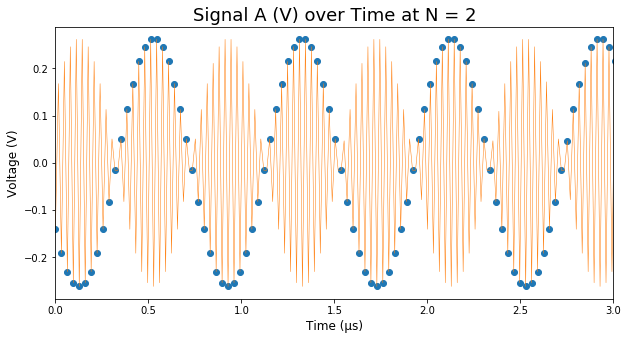

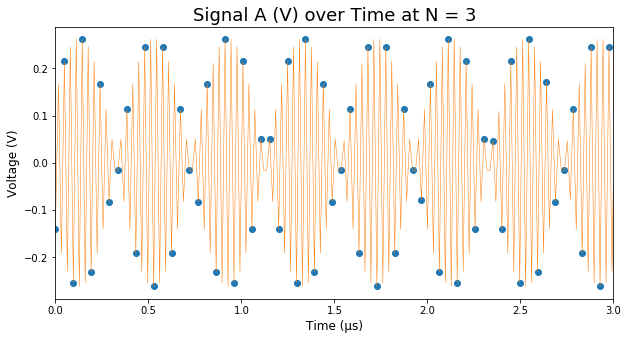

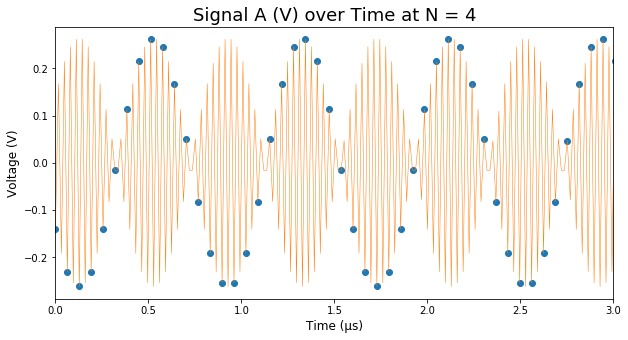

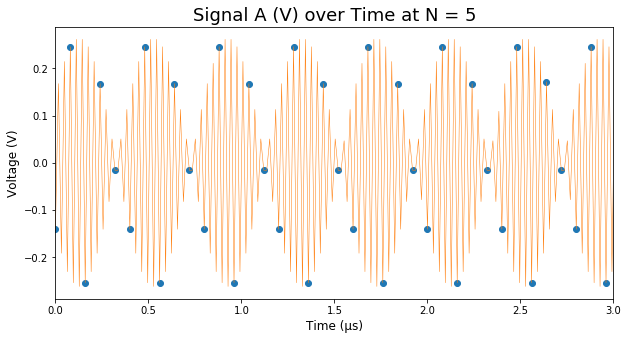

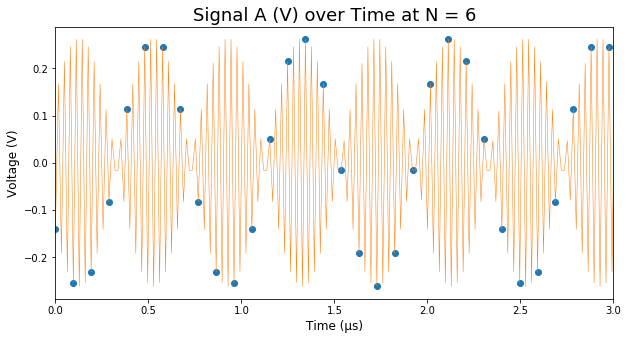

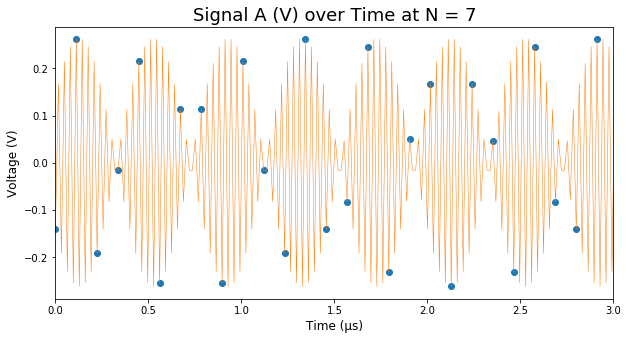

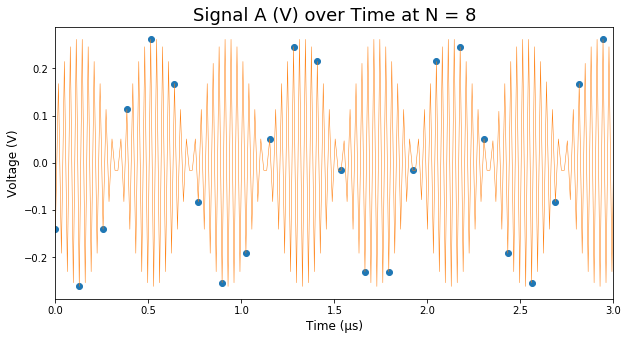

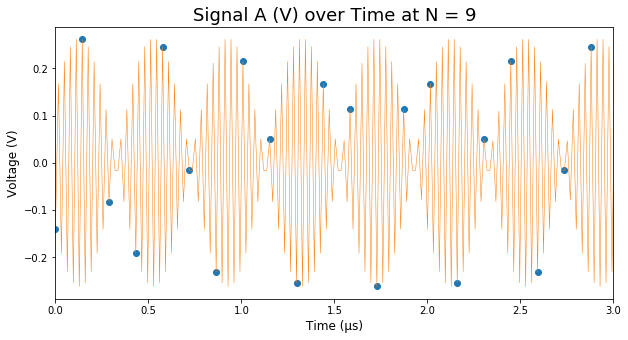

In [22]:
for j in range(2, 10):
    sig_a_data_1 = imported_data["arr_0"][0,0, :200*j]
    sig_b_data_1 = imported_data["arr_0"][1,0, :200*j]
    sig_a_data_2 = sig_a_data_1[::j]
    sig_b_data_2 = sig_b_data_1[::j]
    ft_time_2 = dft.dft(sig_a_data_2, vsamp=62500000/(j))[0]
    ft_time1_2 = ft_time/10**6 #unit conversion to MHz

    data_length = len(sig_a_data_2)
    sampling_frequency_Hz_N = sampling_frequency_Hz/(j) 
    delta_t = 1/sampling_frequency_Hz_N
    total_time = delta_t * data_length  
    times_2 = np.arange(0, total_time, delta_t)

    plt.figure(figsize=(10,5))
    plt.xlim(0, 3)
    plt.xlabel("Time (μs)", fontsize=12)
    plt.ylabel("Voltage (V)", fontsize=12)
    plt.title("Signal A (V) over Time at N = " + str(j), fontsize=18)
    plt.plot(times_2*(10**6), sig_a_data_2/(2**16), "o", linewidth=2)
    plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=.5)

# Compare Time and Frequency Domains

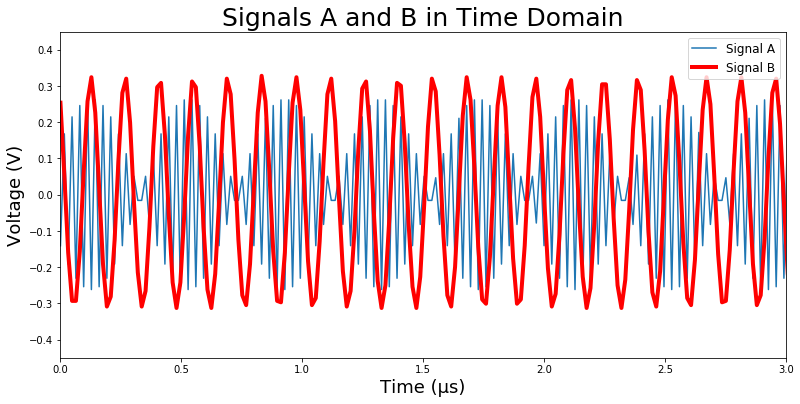

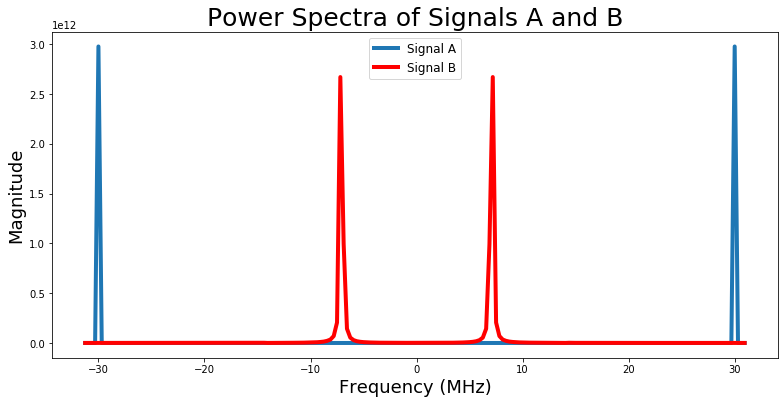

In [23]:
plt.figure(figsize=(13,6))
#plt.xlim(0, total_time)
plt.xlim(0, 3)
plt.ylim(-0.45,0.45)
plt.xlabel("Time (μs)", fontsize=18)
plt.ylabel("Voltage (V)", fontsize=18)
plt.title("Signals A and B in Time Domain", fontsize=25)
plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=1.5)
plt.plot(times*(10**6), sig_b_data/(2**16), 'r', linewidth=4)
plt.legend(["Signal A", "Signal B"], loc='upper right', fontsize=12)

plt.figure(figsize=(13,6))
#plt.xlim(-50,50)
plt.plot(ft_time1, power_ft_sig_a, linewidth=4)
plt.plot(ft_time1, power_ft_sig_b, 'r', linewidth=4)
plt.xlabel("Frequency (MHz)", fontsize=18)
plt.ylabel("Magnitude", fontsize=18)
plt.title("Power Spectra of Signals A and B", fontsize=25)
plt.legend(["Signal A", "Signal B"], fontsize=12)
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

# 5.3: Plot real and imaginary parts of voltage spectrum 

Text(0.5, 1.0, 'Signal A Real and Imaginary Discrete Fourier Transform')

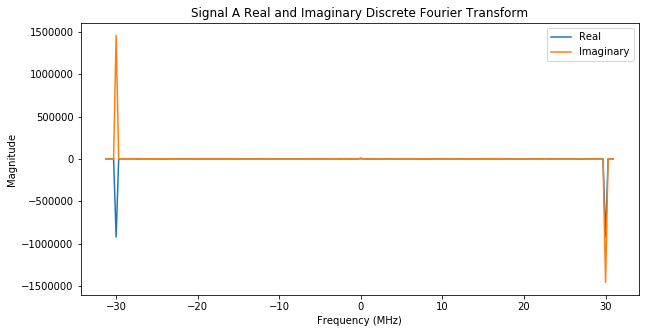

In [24]:
plt.figure(figsize=(10,5))
plt.plot(ft_time1, dft_sig_a.real)
plt.plot(ft_time1, dft_sig_a.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal A Real and Imaginary Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal B Real and Imaginary Discrete Fourier Transform')

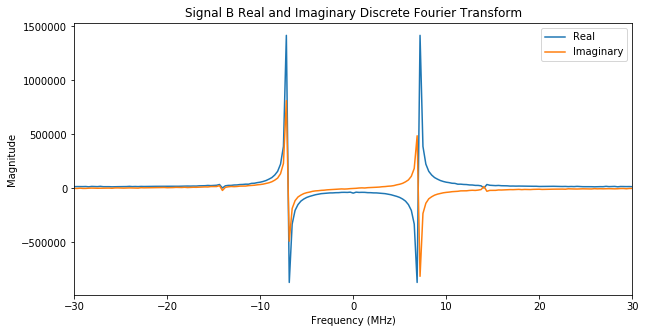

In [25]:
plt.figure(figsize=(10,5))
plt.xlim(-30, 30)
plt.plot(ft_time1, dft_sig_b.real)
plt.plot(ft_time1, dft_sig_b.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal B Real and Imaginary Discrete Fourier Transform")

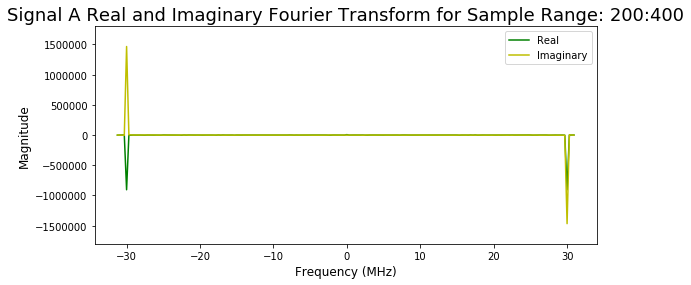

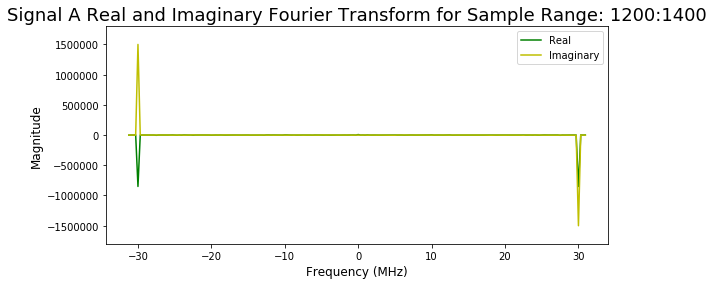

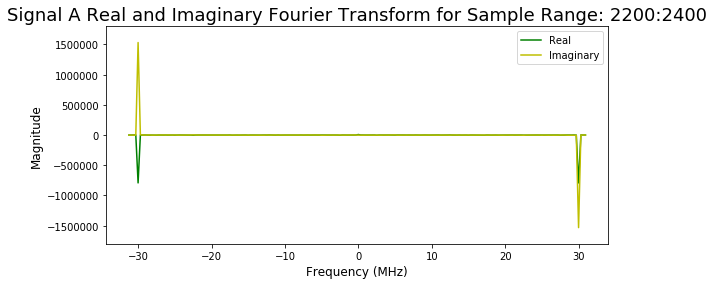

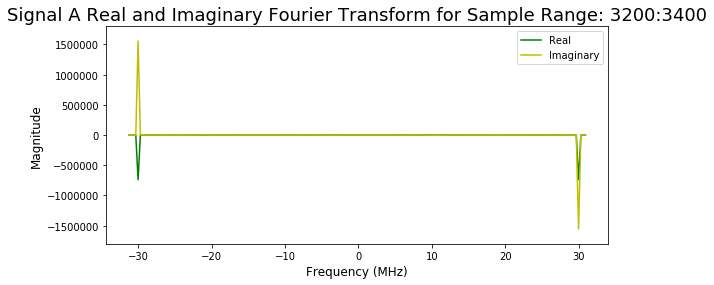

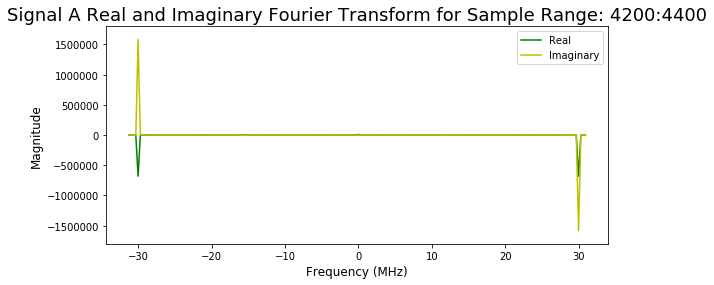

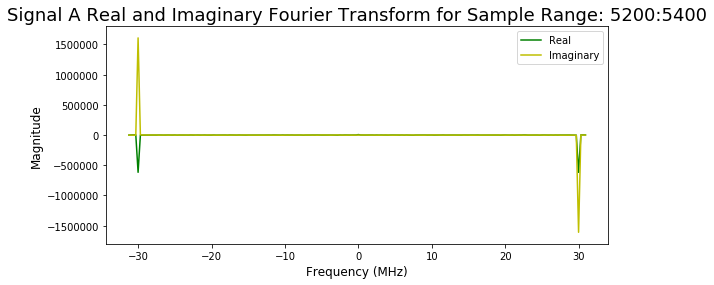

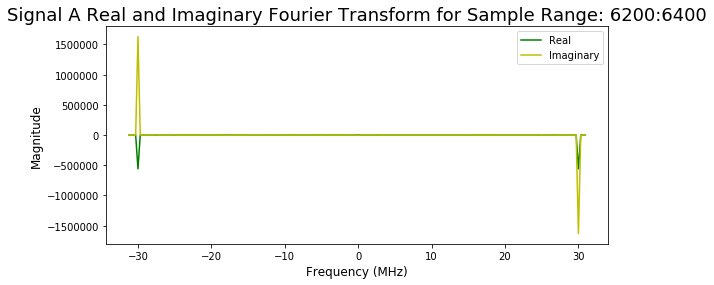

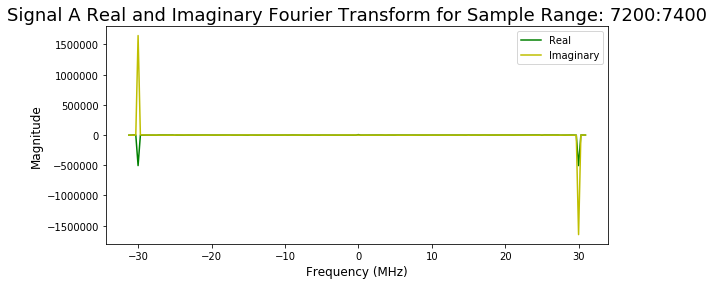

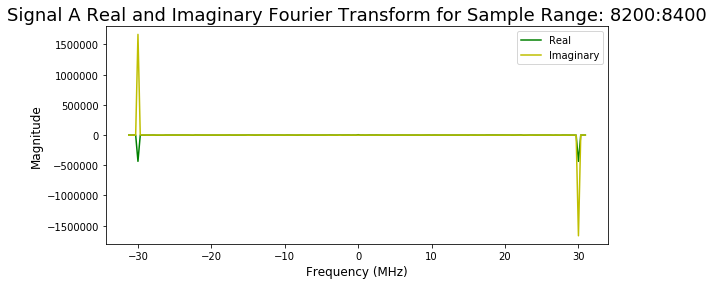

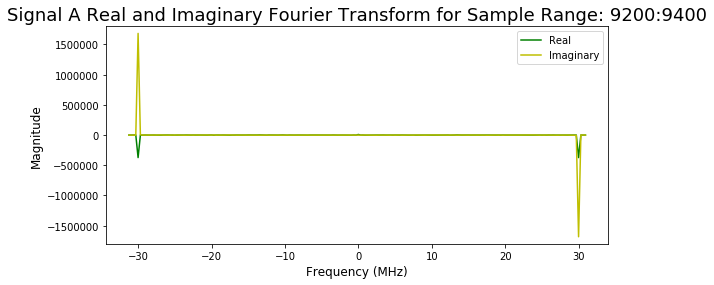

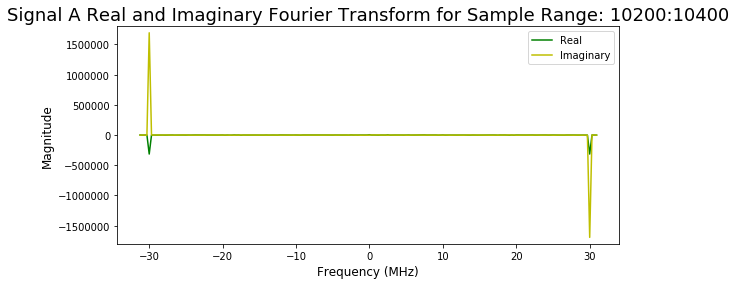

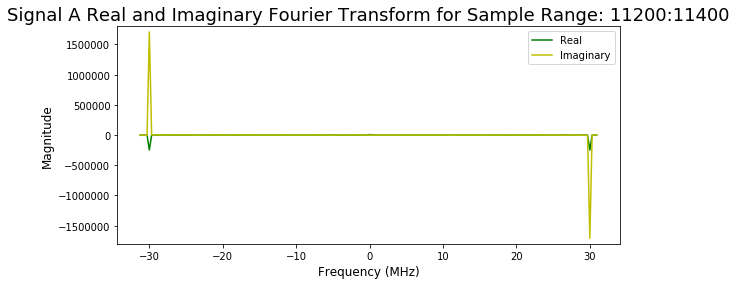

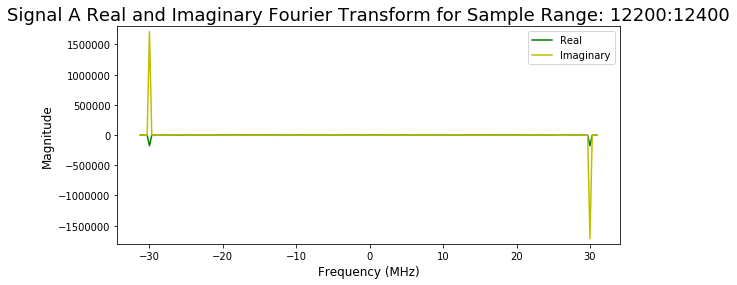

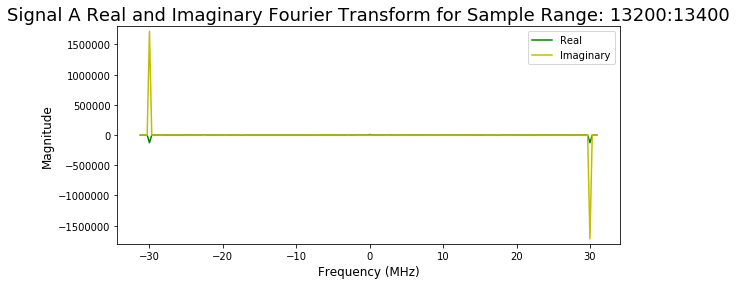

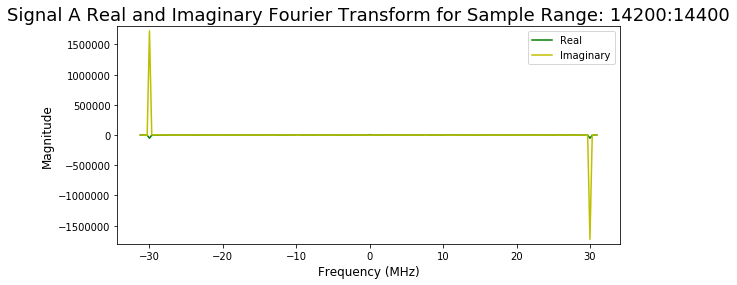

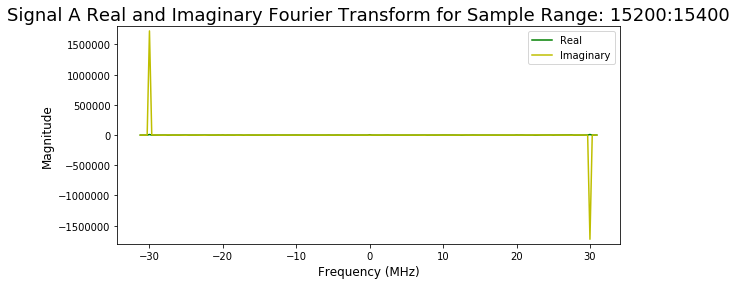

In [26]:
for i in range(200, 16000, 1000):
    sig_a_data_2 = imported_data["arr_0"][0,0, i:i+200]
    dft_sig_a_2 = dft.dft(sig_a_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(9,4))
    #plt.xlim(-30, 30)
    plt.ylim(-1800000, 1800000)
    plt.plot(ft_time1, dft_sig_a_2.real, 'g')
    plt.plot(ft_time1, dft_sig_a_2.imag, 'y')
    plt.xlabel("Frequency (MHz)", fontsize=12)
    plt.ylabel("Magnitude", fontsize=12)
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal A Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200), fontsize=18)

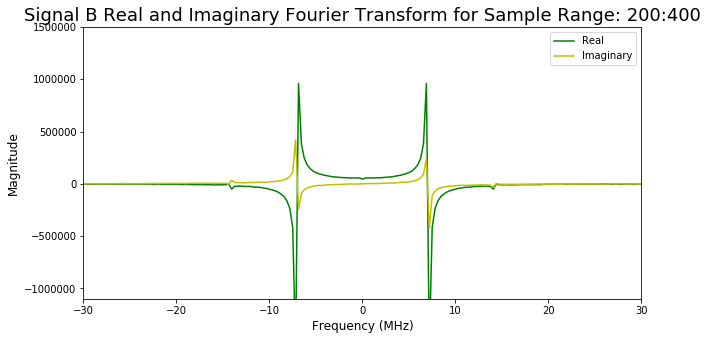

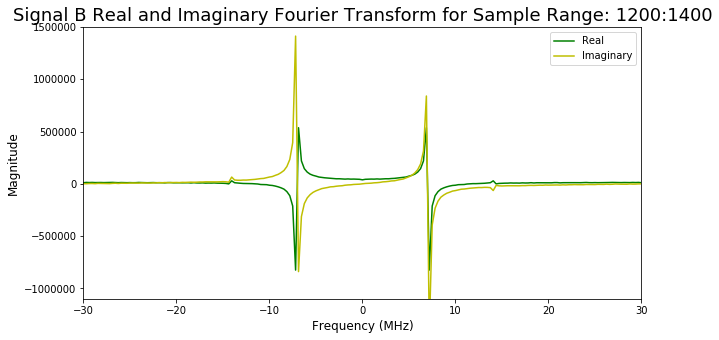

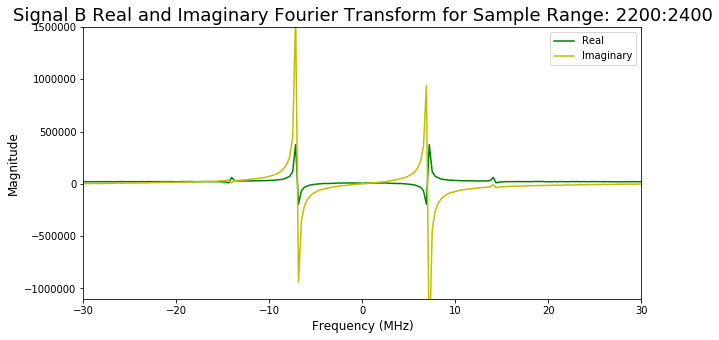

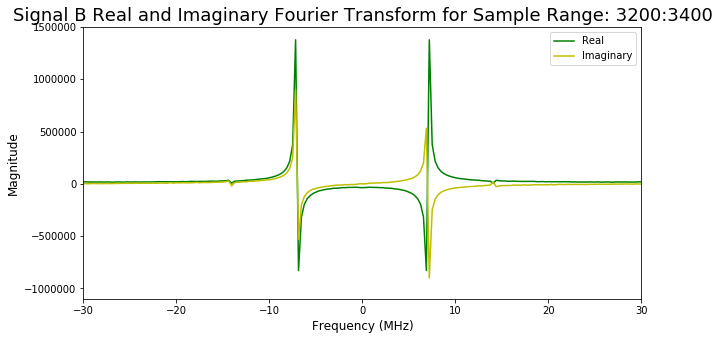

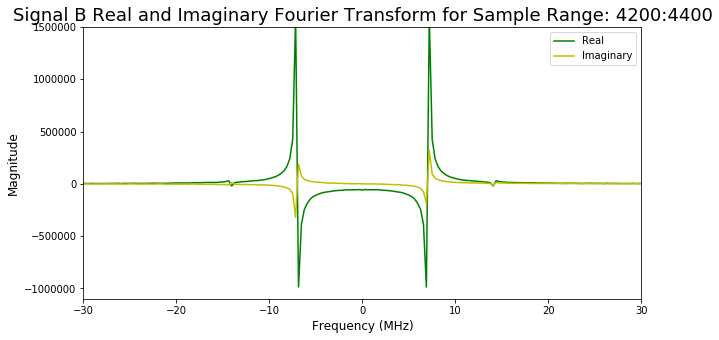

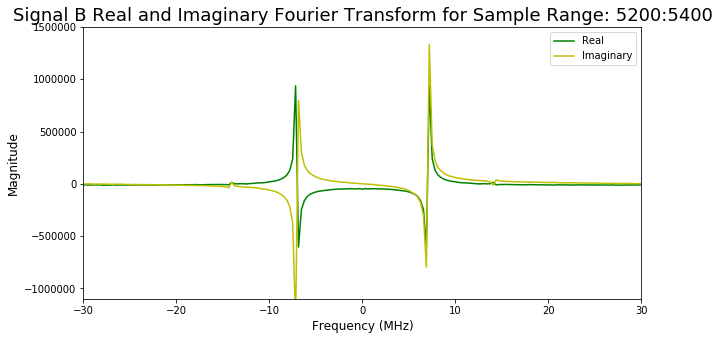

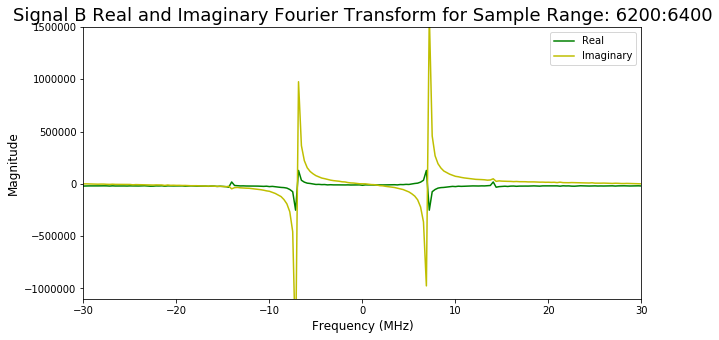

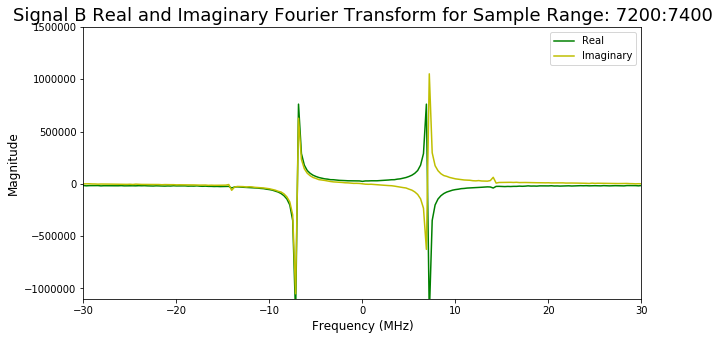

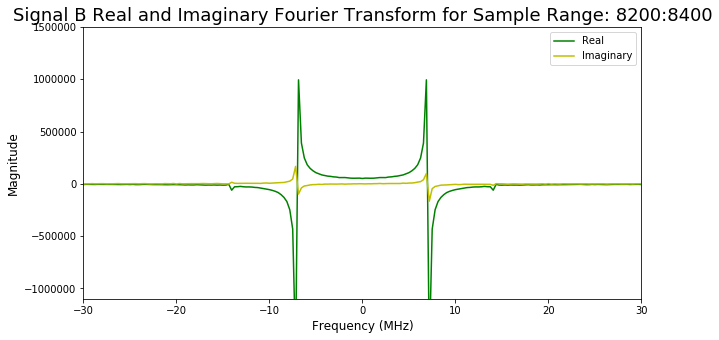

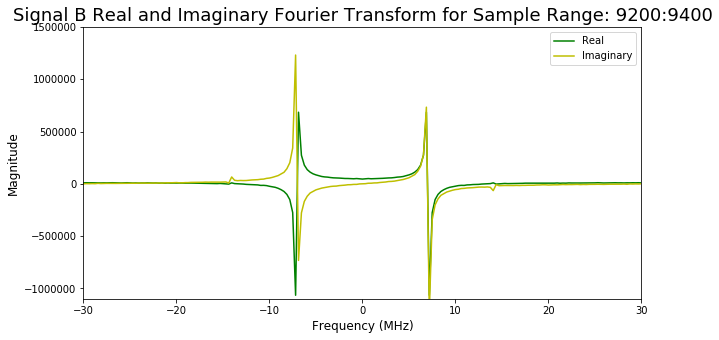

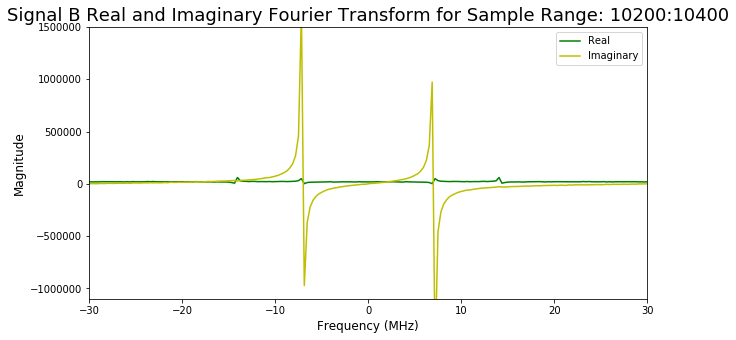

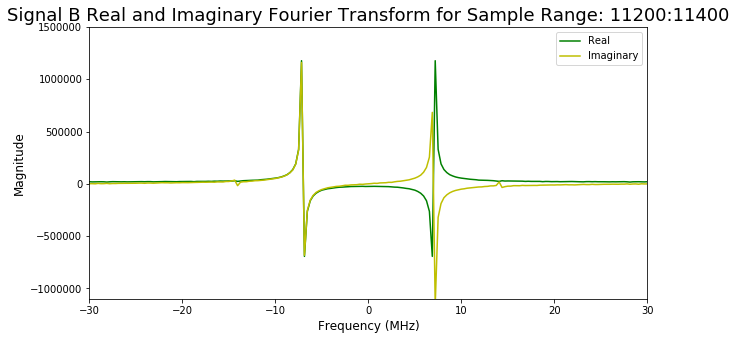

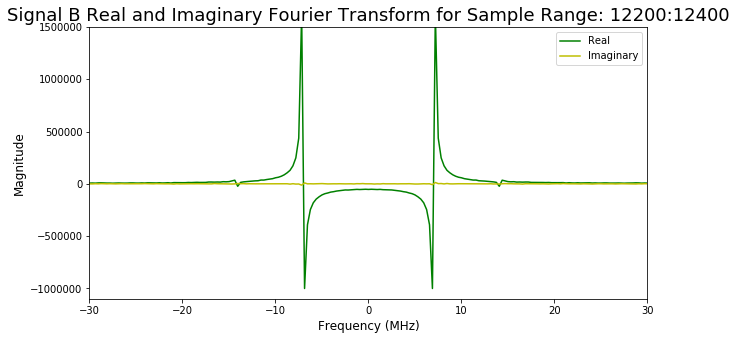

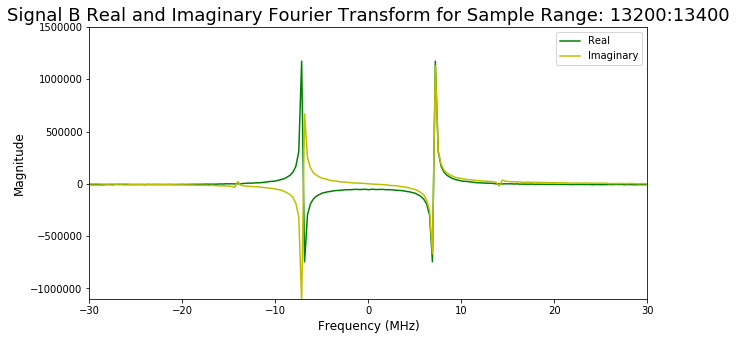

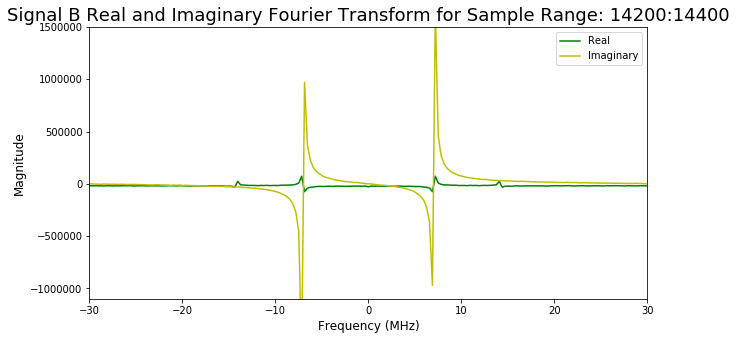

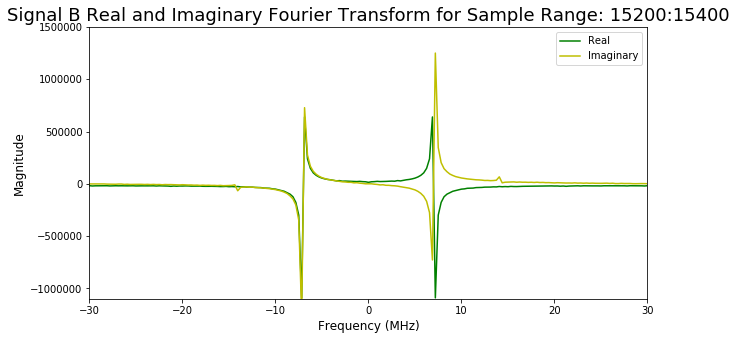

In [27]:
for i in range(200, 16000, 1000):
    sig_b_data_2 = imported_data["arr_0"][1,0, i:i+200]
    dft_sig_b_2 = dft.dft(sig_b_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(10,5))
    plt.xlim(-30, 30)
    plt.ylim(-1100000, 1500000)
    plt.plot(ft_time1, dft_sig_b_2.real, 'g')
    plt.plot(ft_time1, dft_sig_b_2.imag, 'y')
    plt.xlabel("Frequency (MHz)", fontsize=12)
    plt.ylabel("Magnitude", fontsize=12)
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal B Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200), fontsize=18)

# 5.3: Take inverse Fourier Transform of the Power Spectra 

In [28]:
power_spectra_sig_a = abs((dft_sig_a))**2
power_spectra_sig_b = abs((dft_sig_b))**2
idft_power_spectra_sig_a = dft.idft(power_spectra_sig_a)[1]
idft_power_spectra_sig_b = dft.idft(power_spectra_sig_b)[1]

print(len(idft_power_spectra_sig_a))

200


## 5.3: Calculate autocorrelation function (ACF) for signal a

In [40]:
N = 1000 # number of samples
f = imported_data["arr_0"][0,0] # or secret_message_datavor idft_power_spectra_sig_a
f = f.astype(np.float64)[:N]
corr_numpy = np.correlate(f, f, mode='same')
corr_scipy = scipy.correlate(f, f, mode='same')

fft = np.fft.fft(f)
acf = np.fft.ifft(fft * fft.conj())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  """


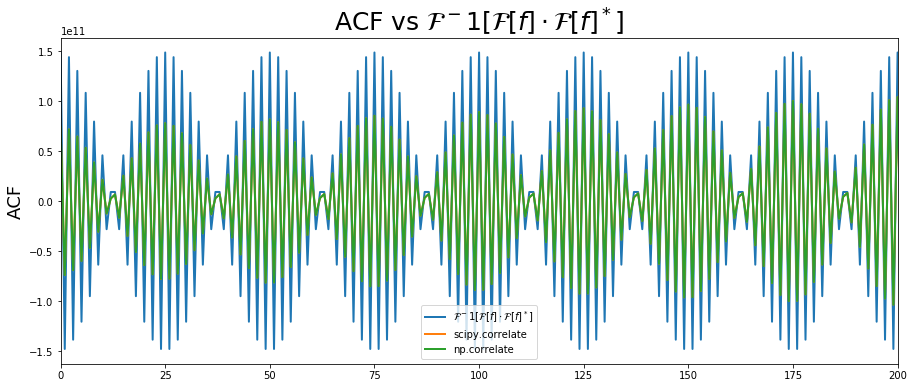

In [41]:
plt.figure(figsize=(15,6))
plt.plot(acf.real, label='$\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$', linewidth=2)
plt.plot(corr_scipy, label='scipy.correlate', linewidth=2)
plt.plot(corr_numpy, label ='np.correlate', linewidth=2)
plt.ylabel('ACF', fontsize=18)
plt.xlim(0,200)
plt.title("ACF vs $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

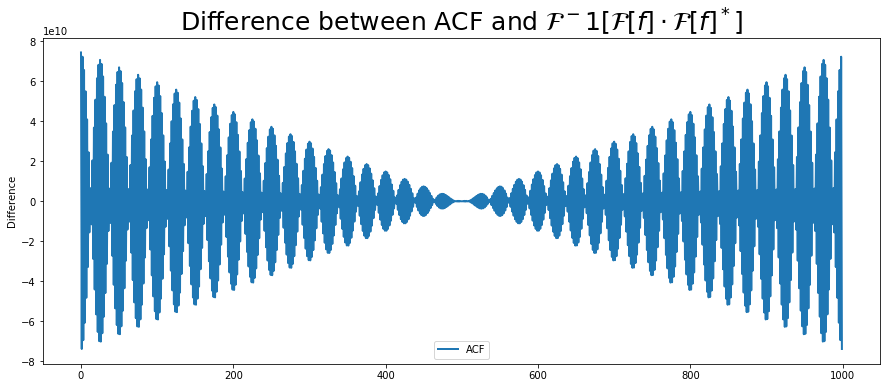

In [42]:
plt.figure(figsize=(15,6))
plt.plot(acf.real-corr_numpy, label='ACF', linewidth=2)
plt.ylabel('Difference')
plt.title("Difference between ACF and $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

## 5.3: Calculate autocorrelation function (ACF) for secret message

In [31]:
N = 200 # number of samples
f = secret_message_data # or secret_message_datavor idft_power_spectra_sig_a
f = f.astype(np.float64)[:N]
corr_numpy = np.correlate(f, f, mode='same')
corr_scipy = scipy.correlate(f, f, mode='same')

fft = np.fft.fft(f)
acf = np.fft.ifft(fft * fft.conj())

NameError: name 'secret_message_data' is not defined

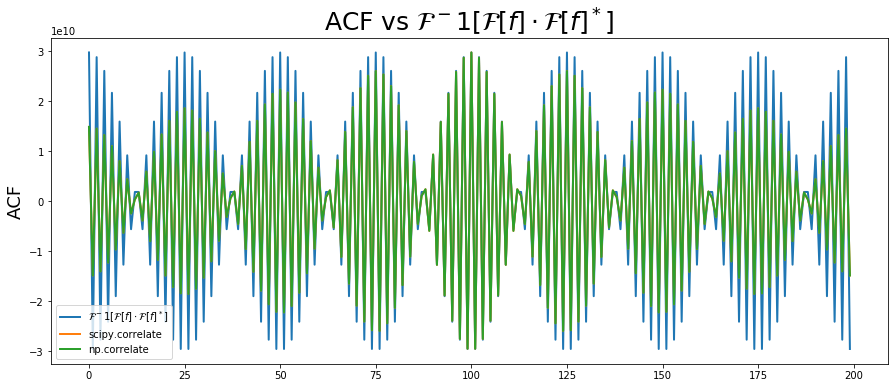

In [32]:
plt.figure(figsize=(15,6))
plt.plot(acf.real, label='$\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$', linewidth=2)
plt.plot(corr_scipy, label='scipy.correlate', linewidth=2)
plt.plot(corr_numpy, label ='np.correlate', linewidth=2)
plt.ylabel('ACF', fontsize=18)
plt.title("ACF vs $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

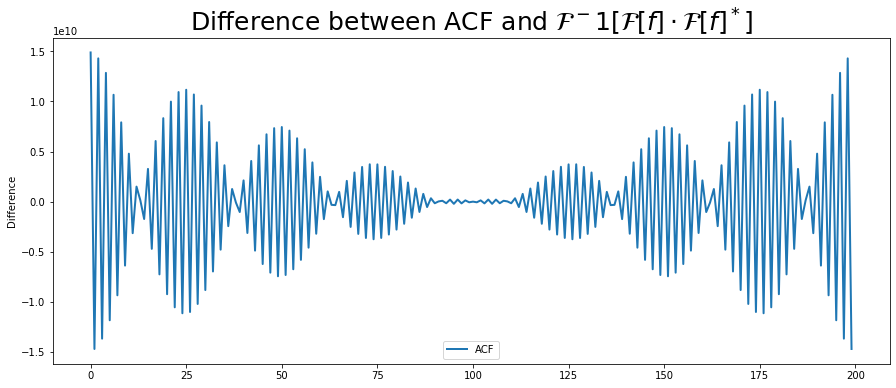

In [33]:
plt.figure(figsize=(15,6))
plt.plot(acf.real-corr_numpy, label='ACF', linewidth=2)
plt.ylabel('Difference')
plt.title("Difference between ACF and $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

## 5.3: Calculate autocorrelation function (ACF) for inverse FT of signal A's power spectrum

In [34]:
N = 200 # number of samples
f = idft_power_spectra_sig_a
f = f.astype(np.float64)[:N]
corr_numpy = np.correlate(f, f, mode='same')
corr_scipy = scipy.correlate(f, f, mode='same')

fft = np.fft.fft(f)
acf = np.fft.ifft(fft * fft.conj())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  """


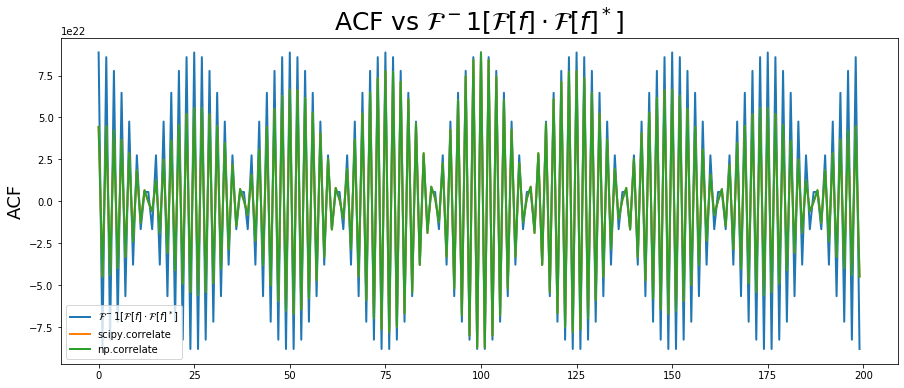

In [35]:
plt.figure(figsize=(15,6))
plt.plot(acf.real, label='$\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$', linewidth=2)
plt.plot(corr_scipy, label='scipy.correlate', linewidth=2)
plt.plot(corr_numpy, label ='np.correlate', linewidth=2)
plt.ylabel('ACF', fontsize=18)
plt.title("ACF vs $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

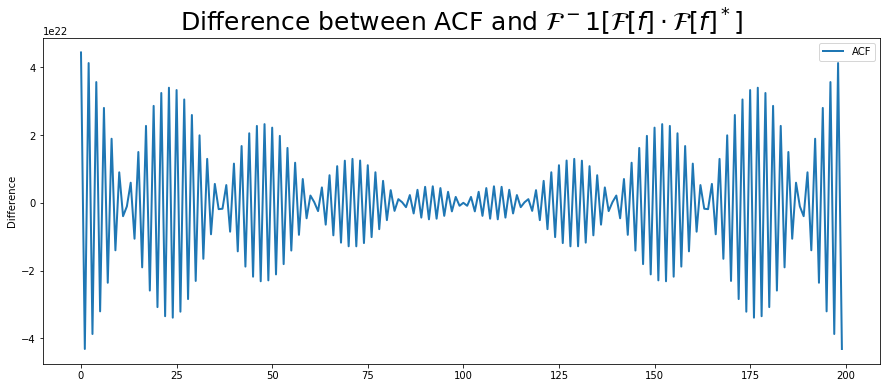

In [36]:
plt.figure(figsize=(15,6))
plt.plot(acf.real-corr_numpy, label='ACF', linewidth=2)
plt.ylabel('Difference')
plt.title("Difference between ACF and $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

## Secret Message

In [37]:
imported_secret_message = np.load("secret_message.npz")

In [38]:
imported_secret_message.files

['data', 'fs']

In [39]:
secret_message_data = imported_secret_message['data']

In [40]:
secret_message_data

array([-1.6364371e-03, -1.1785750e-03, -7.8403420e-04, ...,
        5.4653932e-04,  1.7321830e-06,  5.0060858e-04], dtype=float32)

In [41]:
# take the ft, plot power spectra, find frequencies, identify higher frequencies, 
# and then replace fft values that fall on that frequency value with 0, and then take inverse fourier, and then re plot

# 5.4 Spectral Leakage

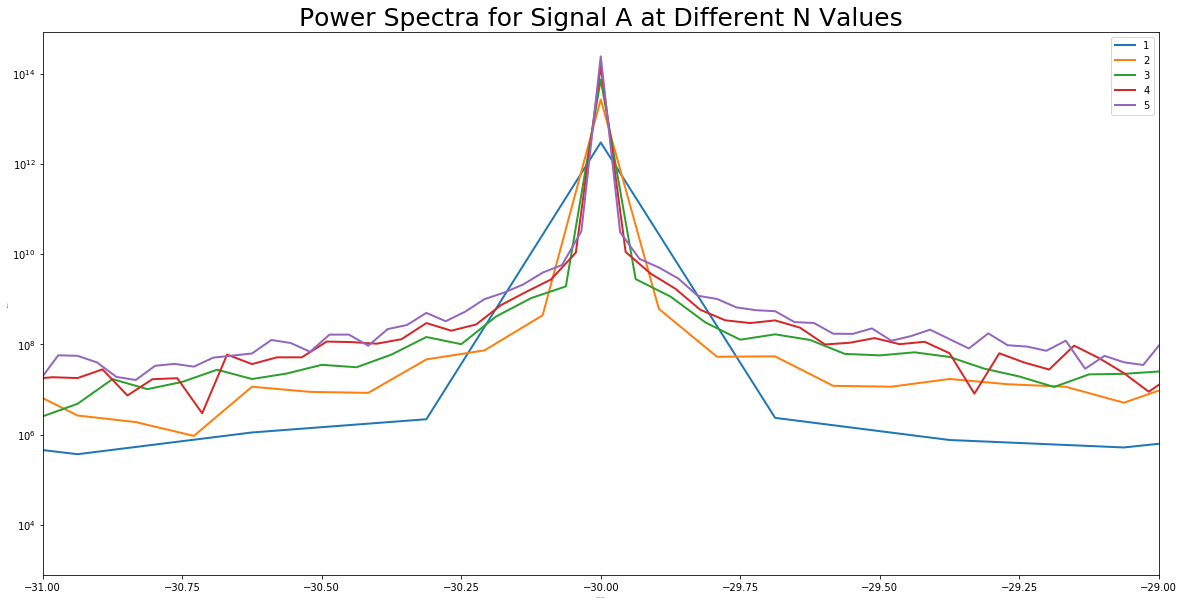

In [42]:
plt.figure(figsize=(20,10))
for N in range(1,10,2):
    # dft.dft
    sig_a_leak = imported_data["arr_0"][0,0, :200*N]
    sig_b_leak = imported_data["arr_0"][1,0, :200*N]
    
    dft_sig_a_leak = dft.dft(sig_a_leak, vsamp=62.5e6)[1]
    dft_sig_b_leak = dft.dft(sig_b_leak, vsamp=62.5e6)[1]

    ft_time = dft.dft(sig_b_leak, vsamp=62.5e6)[0]
    ft_time1= ft_time/10**6 #unit conversion to MHz

    power_dft_sig_a_leak = [abs(s)**2 for s in dft_sig_a_leak]
    power_dft_sig_b_leak = [abs(s)**2 for s in dft_sig_b_leak]
    
    plt.yscale('log')
    plt.plot(ft_time1, power_dft_sig_a_leak, linewidth=2)
    #plt.plot(ft_time1, power_dft_sig_b_leak, 'r', linewidth=5)
    plt.legend([x for x in range(1,10)])
    plt.xlabel("Frequency (MHz)", fontsize=1)
    plt.ylabel("Magnitude", fontsize=1)
    plt.title("Power Spectra for Signal A at Different N Values", fontsize=25)
    plt.xlim(-31, -29) # zooms into one peak to show how peak gets narrower with more samples
    #plt.ylim(-25000,25000)
    


# 5.5: Frequency Resolution

$-\frac{N}{2}\Delta \nu$ to $+\frac{N}{2}\Delta \nu$

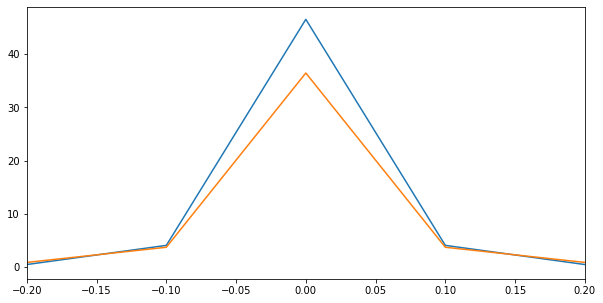

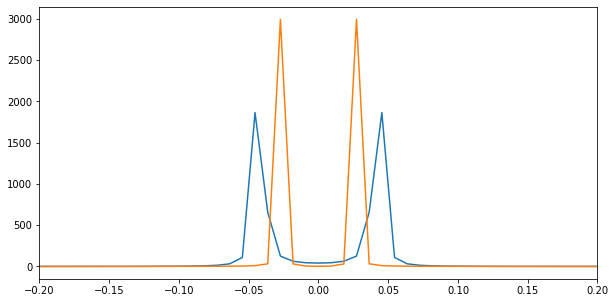

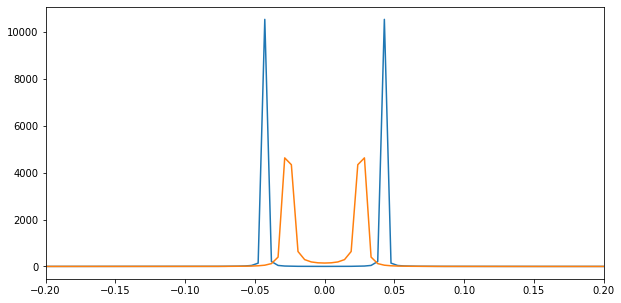

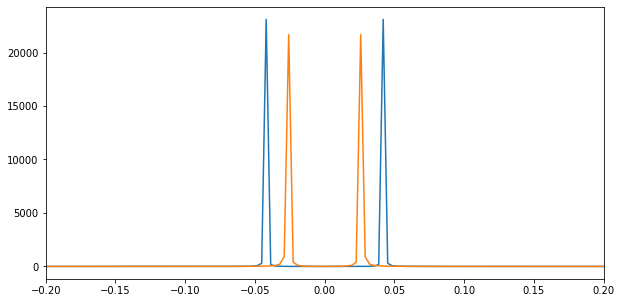

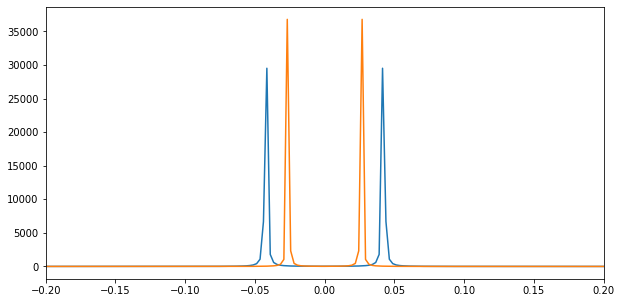

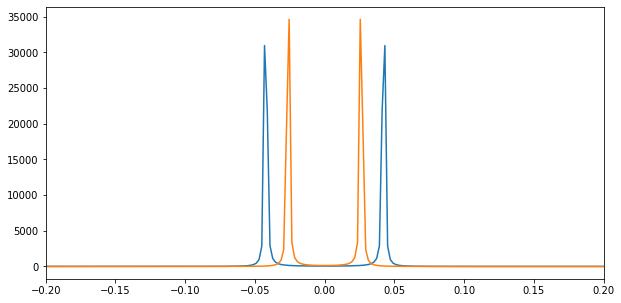

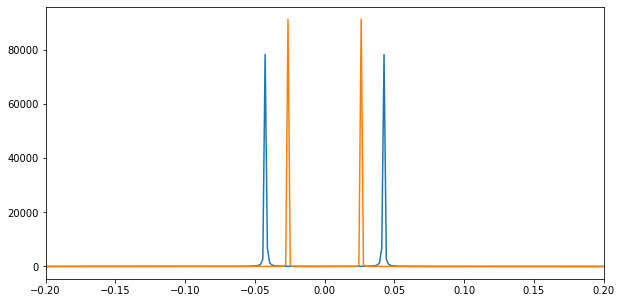

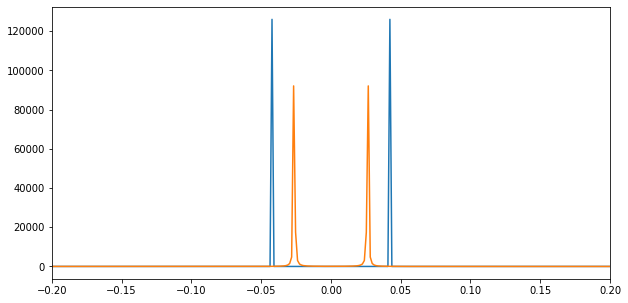

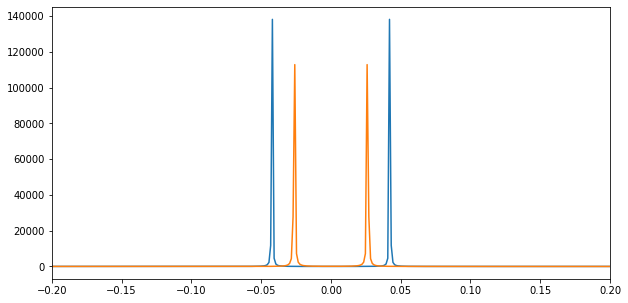

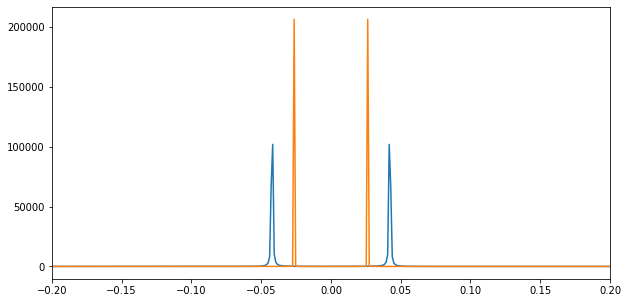

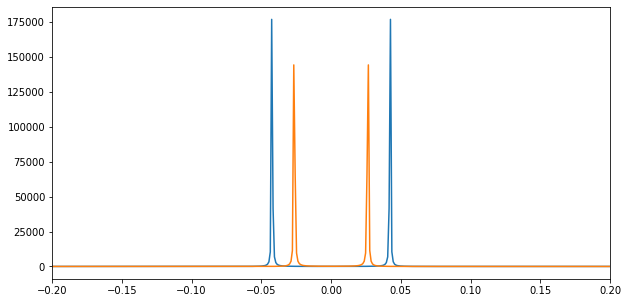

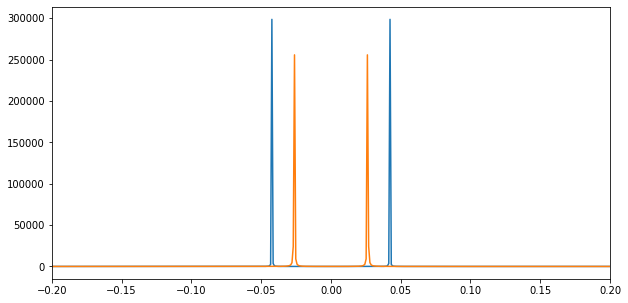

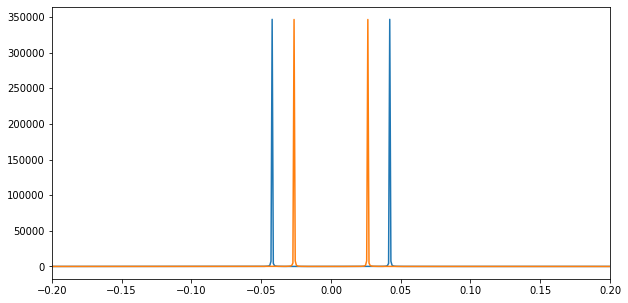

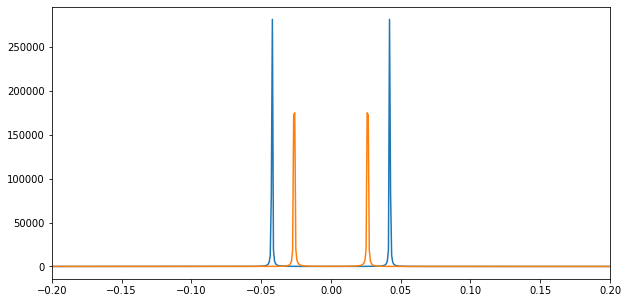

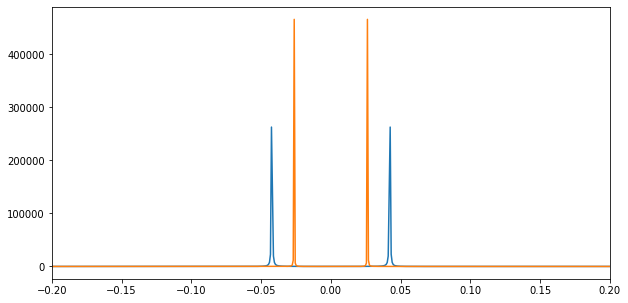

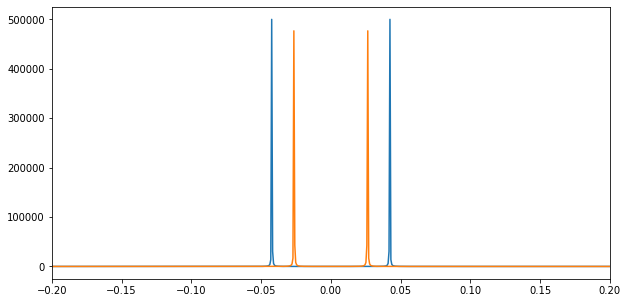

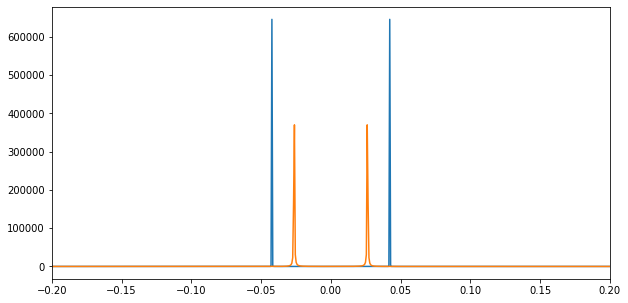

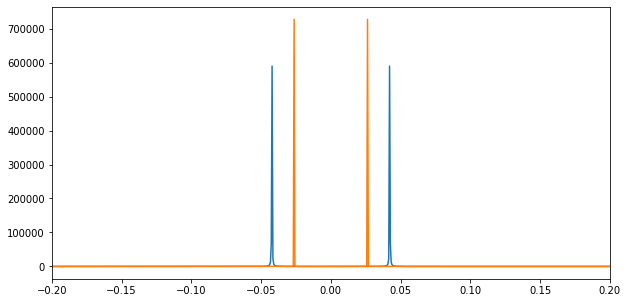

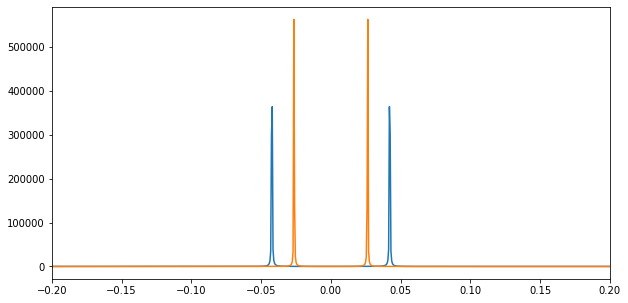

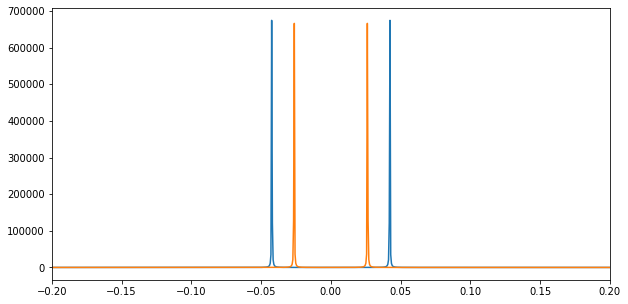

In [43]:
# for higher frequency, decrease N and increase time_interval
N = 1
for time_interval in range(10,2000,100):
    nu_f = 50
    nu_g = 50.1
    
    delta_nu_f = nu_f/N
    delta_nu_g = nu_g/N
    delta_nu = abs(nu_f-nu_g)
    
    f = [np.sin(nu_f*t) for t in range(0,time_interval, N)]
    g = [np.sin(nu_g*t) for t in range(0,time_interval, N)]
    #print("frequency difference < delta nu : " + str(delta_nu_f > delta_nu and delta_nu_g > delta_nu))

    dft_f = dft.dft(f, vsamp=len(f)/(time_interval))[1]
    dft_g = dft.dft(g, vsamp=len(g)/(time_interval))[1]

    ft_time = dft.dft(f, vsamp=len(f)/(time_interval))[0]
    ft_time1= ft_time/10**6 #unit conversion to MHz

    power_dft_f = [abs(s)**2 for s in dft_f]
    power_dft_g = [abs(s)**2 for s in dft_g]

    plt.figure(figsize=(10,5))
    plt.plot(ft_time, power_dft_f)
    plt.plot(ft_time, power_dft_g)
    plt.xlim(-.2,.2)
    
    i = power_dft_f.index(max(power_dft_f))
    f_freq = abs(ft_time[i])
    
    j = power_dft_g.index(max(power_dft_g))
    g_freq = abs(ft_time[j])
    
    #print("Frequency Resolution: " + str(abs(f_freq-g_freq)))
    #resolution_array.append(abs(f_freq-g_freq))


    #plt.figure(figsize=(20,10))
    #plt.plot(f)
    #plt.plot(g)



In [44]:
###  higher resolution means smaller delta_nu, larger time interval . inverseley proportial. uncertainty principle. larger the time interval, the higher the resolution. the larger the N, the divisor, the more time samples you will need to achieve the same resolution.
### also make a actual resolution array. time interval/samples

In [45]:
time_interval_list = [x for x in range(10,15000,100)]
resolution_array_plot = list(set(resolution_array))
len(resolution_array)
len(time_interval_list)

NameError: name 'resolution_array' is not defined

In [46]:
plt.plot(time_interval_list, resolution_array_plot)
plt.ylabel("Resolution")
plt.xlabel('Time Interval')
plt.title('Delta Frequency over Time Interval')
# as the time interval grows, the difference in frequencies gets close to .1 which is the absolute difference in frequencies unless the frequency units are completely off 

NameError: name 'resolution_array_plot' is not defined

# 5.6: Nyquist Windows

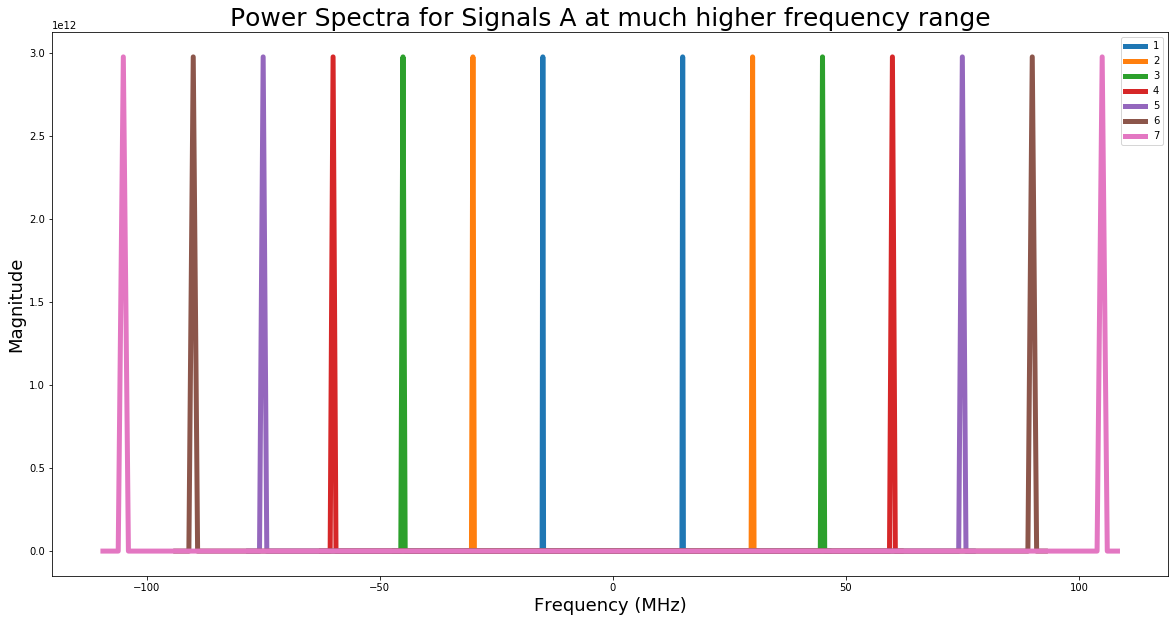

In [44]:
plt.figure(figsize=(20,10))
for W in range(1,8):
    dft_sig_a_window = dft.dft(sig_a_data, vsamp=62.5e6*W/2)[1]
    ft_time = dft.dft(dft_sig_a_window, vsamp=62.5e6*W/2)[0]
    ft_time1 = ft_time/10**6 #unit conversion to MHz
    
    power_sig_a_window = [abs(s)**2 for s in dft_sig_a_window]
    
    plt.plot(ft_time1, power_sig_a_window, linewidth=5, label=W)
    plt.xlabel("Frequency (MHz)", fontsize=18)
    plt.ylabel("Magnitude", fontsize=18)
    plt.title("Power Spectra for Signals A at much higher frequency range", fontsize=25)
    plt.legend()
    # at higher ranges, frequency peaks exist at fs +- N(fs/2)

# 5.7 : Fourier Transforms of Noise

In [46]:
noise_data = ugradio.pico.capture_data("1V", divisor=1, dual_mode=False, nblocks=32)

In [47]:
noise_data.shape

(1, 32, 16000)

In [48]:
print( "Max voltage over block 1 sample : " + str(np.max(noise_data[0, 0])))

Max voltage over block 1 sample : 1024


In [49]:
print( "Min voltage over block 1 sample : " + str(np.min(noise_data[0, 0])))

Min voltage over block 1 sample : -768


In [50]:
print( "Mean voltage over block 1 sample : " + str(np.mean(noise_data[0, 0])))

Mean voltage over block 1 sample : 49.36


In [51]:
print("Variance over block 1 sample : " + str(np.var(noise_data[0, 0])))

Variance over block 1 sample : 98296.5184


In [52]:
print("Standard deviation over block 1 sample : " + str(np.std(noise_data[0, 0])))

Standard deviation over block 1 sample : 313.5227557929408


In [55]:
noise_hist = np.histogram(noise_data[0, 0])
noise_hist

(array([ 109, 1174, 3664,    0, 4465, 3949,    0, 2338,  291,   10]),
 array([-768. , -588.8, -409.6, -230.4,  -51.2,  128. ,  307.2,  486.4,
         665.6,  844.8, 1024. ]))

(array([ 109.,    0.,    0.,    0.,    0.,    0.,    0., 1174.,    0.,
           0.,    0.,    0.,    0.,    0., 3664.,    0.,    0.,    0.,
           0.,    0.,    0., 4465.,    0.,    0.,    0.,    0.,    0.,
           0., 3949.,    0.,    0.,    0.,    0.,    0.,    0., 2338.,
           0.,    0.,    0.,    0.,    0.,    0.,  291.,    0.,    0.,
           0.,    0.,    0.,    0.,   10.]),
 array([-768.  , -732.16, -696.32, -660.48, -624.64, -588.8 , -552.96,
        -517.12, -481.28, -445.44, -409.6 , -373.76, -337.92, -302.08,
        -266.24, -230.4 , -194.56, -158.72, -122.88,  -87.04,  -51.2 ,
         -15.36,   20.48,   56.32,   92.16,  128.  ,  163.84,  199.68,
         235.52,  271.36,  307.2 ,  343.04,  378.88,  414.72,  450.56,
         486.4 ,  522.24,  558.08,  593.92,  629.76,  665.6 ,  701.44,
         737.28,  773.12,  808.96,  844.8 ,  880.64,  916.48,  952.32,
         988.16, 1024.  ]),
 <a list of 50 Patch objects>)

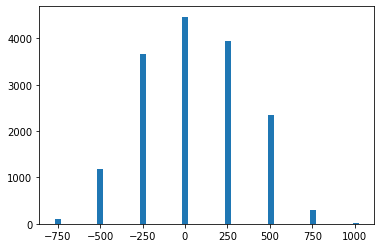

In [58]:
plt.hist(noise_data[0, 0], bins=50)

In [53]:
from scipy.stats import norm

(array([  73.,    0.,    0.,    0.,    0.,    0.,    0., 1212.,    0.,
           0.,    0.,    0.,    0.,    0., 3632.,    0.,    0.,    0.,
           0.,    0.,    0., 4498.,    0.,    0.,    0.,    0.,    0.,
           0., 4074.,    0.,    0.,    0.,    0.,    0.,    0., 2256.,
           0.,    0.,    0.,    0.,    0.,    0.,  246.,    0.,    0.,
           0.,    0.,    0.,    0.,    9.]),
 array([-768.  , -732.16, -696.32, -660.48, -624.64, -588.8 , -552.96,
        -517.12, -481.28, -445.44, -409.6 , -373.76, -337.92, -302.08,
        -266.24, -230.4 , -194.56, -158.72, -122.88,  -87.04,  -51.2 ,
         -15.36,   20.48,   56.32,   92.16,  128.  ,  163.84,  199.68,
         235.52,  271.36,  307.2 ,  343.04,  378.88,  414.72,  450.56,
         486.4 ,  522.24,  558.08,  593.92,  629.76,  665.6 ,  701.44,
         737.28,  773.12,  808.96,  844.8 ,  880.64,  916.48,  952.32,
         988.16, 1024.  ]),
 <a list of 50 Patch objects>)

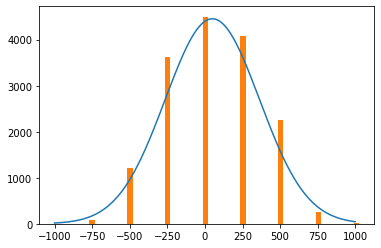

In [54]:
#z1 = (np.min(noise_data[0, 0]) - np.mean(noise_data[0, 0])) / np.std(noise_data[0, 0])
#z2 = (np.max(noise_data[0, 0]) - np.mean(noise_data[0, 0])) / np.std(noise_data[0, 0])
#x = np.arange(z1, z2)
#y = norm.pdf(x)
#x_all = np.arange(-1000, 1000, .001)
#y2 = norm.pdf(x_all, np.mean(noise_data[0, 0]), np.std(noise_data[0, 0]))
#plt.plot(x_all, y2

mean = np.mean(noise_data[0, 0])
standard_deviation = np.std(noise_data[0, 0])

x_values = np.arange(-1000, 1000)
y_values = scipy.stats.norm(mean, standard_deviation)

plt.plot(x_values, 3500000*y_values.pdf(x_values))
plt.hist(noise_data[0, 0], bins=50)

In [55]:
noise_data[0]

array([[   0,  512, -512, ...,  256,  512, -512],
       [   0,  512, -256, ...,    0,  256,    0],
       [-512,  256,  512, ...,    0,  512, -256],
       ...,
       [-256,    0,  256, ..., -256,    0,  256],
       [ 256,    0, -512, ...,  256, -256,  256],
       [ 256,  256, -256, ...,  768,    0, -256]], dtype=int16)

In [56]:
block_power_spectra = {}
for n in range(0, 32):
    d = noise_data[0][n][:200]
    d_fft = dft.dft(d)[1]
    noise_power_spectrum = [abs(s)**2 for s in d_fft]
    block_power_spectra[n] = noise_power_spectrum
## take the average power spectra over all blocks, and then over N blocks : [array of averages]. log scale. 

In [57]:
# take average of N blocks 
n_avg = []
for n_blocks in [2, 4, 8, 16, 32]:
    n_noise_power_blocks = []
    for n in range(0, n_blocks):
        n_noise_power_blocks.append(block_power_spectra[n])
    n_avg.append(np.mean(n_noise_power_blocks, axis=0))

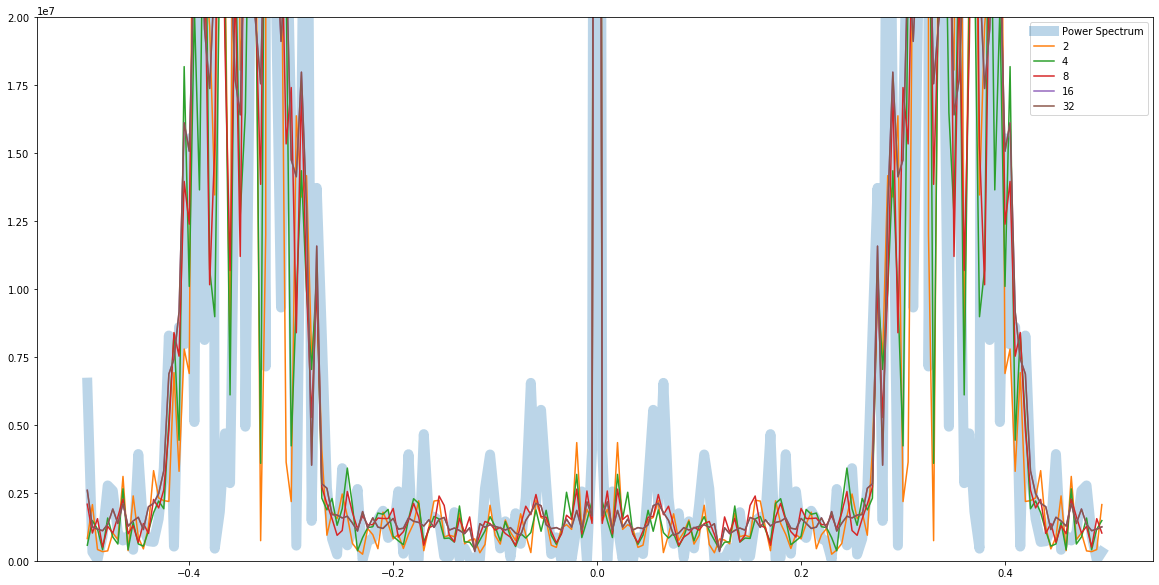

In [60]:
block = 12
ft_time = dft.dft(noise_data[0][block][:200])[0]
plt.figure(figsize=(20,10))
plt.plot(ft_time, block_power_spectra[block], label="Power Spectrum", linewidth=10, alpha=0.3)
plt.plot(ft_time, n_avg[0], label="2")
plt.plot(ft_time, n_avg[1], label="4")
plt.plot(ft_time, n_avg[2], label="8")
plt.plot(ft_time, n_avg[3], label="16")
plt.plot(ft_time, n_avg[3], label="32")
plt.ylim(0, .2e8)
plt.legend()

# the more blocks you average, the smoother your curve should be. aka more samples is less noise.

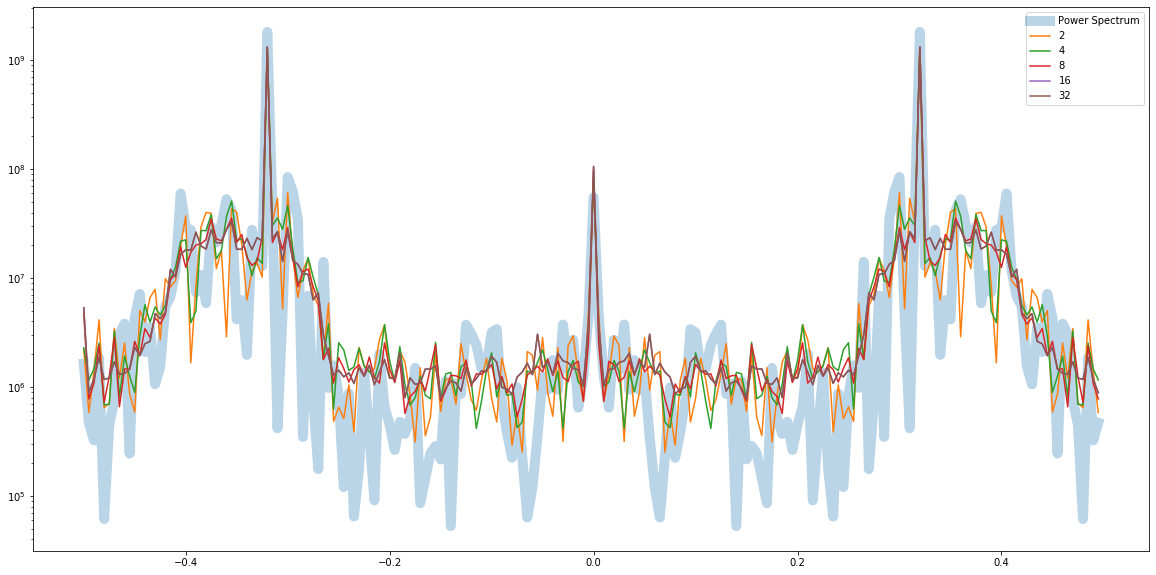

In [101]:
block = 12
ft_time = dft.dft(noise_data[0][block][:200])[0]
plt.figure(figsize=(20,10))
plt.plot(ft_time, block_power_spectra[block], label="Power Spectrum", linewidth=10, alpha=0.3)
plt.plot(ft_time, n_avg[0], label="2")
plt.plot(ft_time, n_avg[1], label="4")
plt.plot(ft_time, n_avg[2], label="8")
plt.plot(ft_time, n_avg[3], label="16")
plt.plot(ft_time, n_avg[3], label="32")
plt.legend()
plt.yscale("log")

# the more blocks you average, the smoother your curve should be. aka more samples is less noise.

# 7.1

In [131]:
mixer_data = np.load('mixer.npy')
mixer_data.shape

(2, 10, 16000)

In [132]:
port_a_data = mixer_data[0,0][:200] # DSB IF output, product of LO and RF 
port_b_data = mixer_data[1,0][:200] # use both ports for SSB, port a is real component of output, port b is imaginary component

In [133]:
port_a_data.size

200

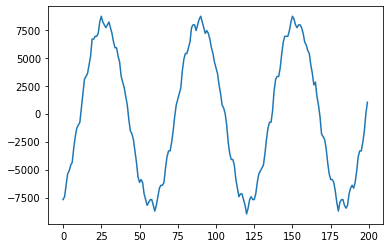

In [134]:
plt.plot(port_a_data)
#2 sine waves mixed ;P

In [135]:
N=1
mixer_a_time, mixer_a_dft = dft.dft(port_a_data, vsamp=62.5e6*N)

In [136]:
power_mixer_a = [abs(s)**2 for s in mixer_a_dft]

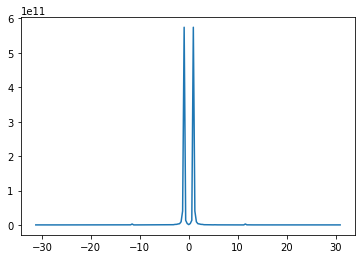

In [147]:
plt.plot(mixer_a_time/10**6, power_mixer_a) # expect to see some copies of freq lines 
#plt.yscale("log")

In [153]:
# LO_freq + peak_freq = RF_freq
LO_freq = 56.25 # we know LO, use power spectra to find IF, figure out RF
i = power_mixer_a.index(max(power_mixer_a))
IF_freq = abs(mixer_a_time[i]/10**6)
RF_freq = LO_freq + IF_freq
print("LO Frequency : " + str(LO_freq) + " MHz")
print("IF Frequency : " + str(IF_freq) + " MHz")
print("RF Frequency : " + str(RF_freq) + " MHz")

LO Frequency : 56.25 MHz
IF Frequency : 0.9375 MHz
RF Frequency : 57.1875 MHz


## add the next two blocks to 5.6

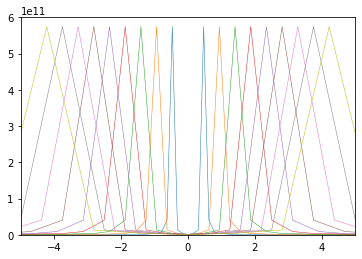

In [143]:
# this isn't meaningful. change divisor instead. 
for N in range (1,10):
    mixer_a_dft = dft.dft(port_a_data, vsamp=62.5e6*N/2)[1]
    mixer_b_dft = dft.dft(port_b_data, vsamp=62.5e6*N/2)[1]
    mixer_a_time = dft.dft(port_a_data, vsamp=62.5e6*N/2)[0]
    mixer_b_time = dft.dft(port_b_data, vsamp=62.5e6*N/2)[0]
    power_mixer_a = [abs(s)**2 for s in mixer_a_dft]
    power_mixer_b = [abs(s)**2 for s in mixer_b_dft]
    plt.plot(mixer_a_time/1e6, power_mixer_a, linewidth=0.5)
    plt.xlim(-5,5)
    plt.ylim(0,6e11)
#resolution gets lower as it gets wider cuz as N gets bigger theres less samples
#use this code for 5.6

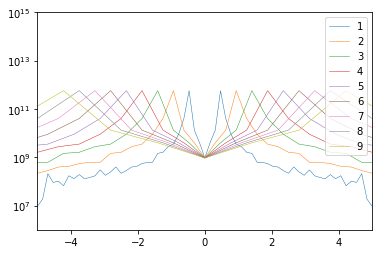

In [144]:
for N in range (1,10):
    mixer_a_time, mixer_a_dft = dft.dft(port_a_data, vsamp=62.5e6*N/2)
    mixer_b_time, mixer_b_dft = dft.dft(port_b_data, vsamp=562.5e6*N/2)
    power_mixer_a = [abs(s)**2 for s in mixer_a_dft]
    power_mixer_b = [abs(s)**2 for s in mixer_b_dft]
    plt.yscale('log')
    plt.plot(mixer_a_time/1e6, power_mixer_a, linewidth=0.5, label=N)
    plt.legend()
    plt.xlim(-5,5)
    plt.ylim(10e5,10e14)
    
#use this code for 5.6

# 7.2

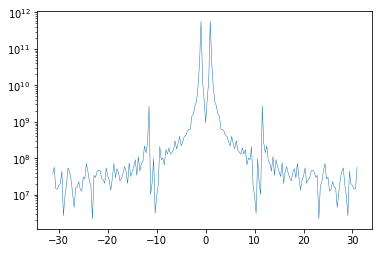

In [146]:
mixer_a_time, mixer_a_dft = dft.dft(port_a_data, vsamp=62.5e6)
power_mixer_a = [abs(s)**2 for s in mixer_a_dft]
plt.yscale('log')
plt.plot(mixer_a_time/1e6, power_mixer_a, linewidth=0.5)

#regularly spaced intervals

## 7.3

In [4]:
N=2
port_a_data = mixer_data[0,0][:200]
port_b_data = mixer_data[1,0][:200]
mixer_a_dft = dft.dft(port_a_data, vsamp=56.25e6*N/2)[1]
mixer_b_dft = dft.dft(port_b_data, vsamp=56.25e6*N/2)[1]

conv = np.convolve(mixer_a_dft, mixer_b_dft)
conv_power = abs(conv)**2
conv.shape
freq_array = np.arange(-200,199)

(-50, 50)

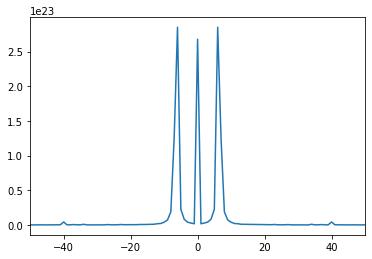

In [7]:
plt.plot(freq_array, conv_power)
plt.xlim(-50,50)
#plt.ylim(0,1e27)
#sum freq is 400 and diff is ~64
#wider peaks bc fewer samples

In [6]:
i = list(conv_power).index(max(conv_power))
conv_frequency = abs(freq_array[i])
print("Differnce Frequency: " + str(conv_frequency) + " MHz")

Differnce Frequency: 6 MHz


In [10]:
N=2
port_a_data = mixer_data[0,0][:200]
port_b_data = mixer_data[1,0][:200]
mixer_a_dft = dft.dft(port_a_data, vsamp=56.25e6*N/2)[1]
mixer_b_dft = dft.dft(port_b_data, vsamp=56.25e6*N/2)[1]

freq_array = np.arange(-200,199)
mixer_a_dft = list(mixer_a_dft)

In [11]:
# keep data array same size, zero-pad the values you want to filter
filtered_mixer_a = [f for f in mixer_a_dft if abs(freq_array[mixer_a_dft.index(f)])<40 or abs(freq_array[mixer_a_dft.index(f)])>41 ]

In [13]:
len(filtered_mixer_a)
#removed sum freq component

198

In [16]:
filtered_mixer_a = np.array(filtered_mixer_a)
filtered_mixer_a = filtered_mixer_a.astype(np.float64)
inv_dft = dft.idft(filtered_mixer_a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


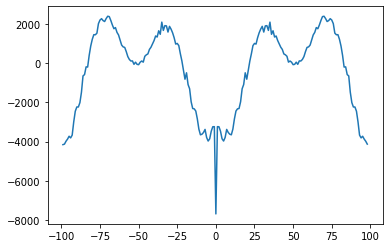

In [19]:
#a = inv_dft[1]
plt.plot(inv_dft[0], inv_dft[1])

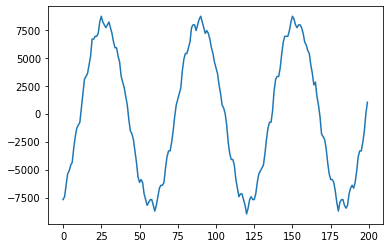

In [21]:
port_a_data = mixer_data[0,0][:200]
plt.plot(port_a_data)

# 7.3

In [ ]:
## vocab lesson: 
# sampling frq: 62.5e6. 
# divisor N: cuts sampling frq by N
# Number of samples N : 16000
# delta nu (resolution) : distance between samples in ft. freq interval/number of samples.  
# part 7 delta nu : IF-LO